In [208]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

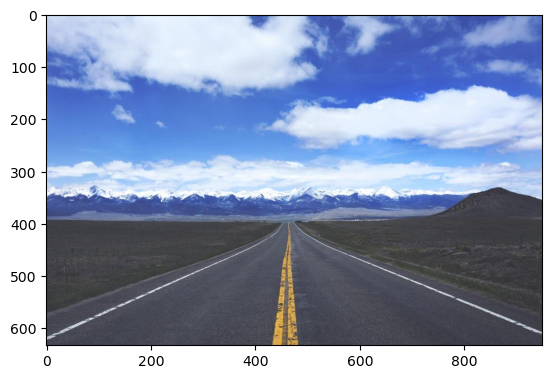

In [248]:
image = cv2.imread('road1.jpg')
# transform colors  
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image) 


In [249]:
def region_of_interest(img,vertices):
    # Apply frame masking and find region of interest
    mask = np.zeros_like(img)
    mask_color = 255
    cv2.fillPoly(mask,vertices,mask_color)
    masked_image = cv2.bitwise_and(img,mask)
    return masked_image

In [250]:
# get shape of vertices for region of interest
imshape = image.shape
top_left = [imshape[1]/2-imshape[1]/5,imshape[0]/2+imshape[0]/7]
top_right = [imshape[1]/2+imshape[1]/5,imshape[0]/2+imshape[0]/7]
# top = [imshape[1]/2,imshape[0]/2-imshape[0]/9]
lower_left = [0,imshape[0]]
lower_right = [imshape[1],imshape[0]]
vertices = np.array([[lower_left,top_left,top_right,lower_right]],dtype=np.int32)
# vertices = np.array([[lower_left,top,lower_right]],dtype=np.int32)


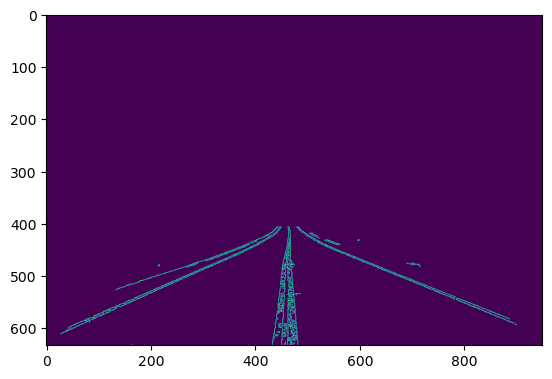

In [251]:
# turn image gray for easier detection 
image_gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY) 
th1=100
th2=200
# use canny edge detection
image_canny = cv2.Canny(image_gray,th1,th2)

cropped_image = region_of_interest(image_canny,vertices)
plt.imshow(cropped_image) 

In [258]:
# apply Hough transform to image
# 
lines=cv2.HoughLinesP(cropped_image,rho=8,theta=np.pi/180,threshold=140,lines=np.array([]), minLineLength=40,maxLineGap=10)

In [259]:
# draw lines on image
def draw_lines(image,lines):
    image = np.copy(image)
    # create new blank image with same size
    blank_image = np.zeros((image.shape[0],image.shape[1],3),dtype=np.uint8)
    for line in lines:
        for x1,y1,x2,y2 in line:
            # on blank image draw lines and choose color 
            cv2.line(blank_image,(x1,y1),(x2,y2),(255,0,0),thickness=6) 
    # combine original image and drawn lines
    image = cv2.addWeighted(image,0.8,blank_image,1,0.0)
    return image

img_with_lines=draw_lines(image,lines)

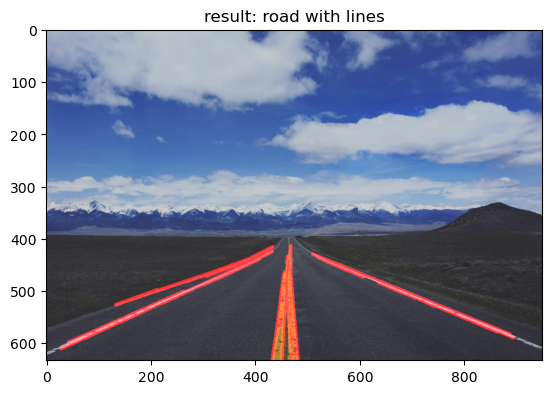

In [260]:

plt.title('result: road with lines')
plt.imshow(img_with_lines)
plt.show()